In [1]:
import numpy as np
from bayespy import nodes

In [3]:
n_documents = 10
n_words = 10000
n_vocabulary = 100
n_topics = 5

In [6]:
word_documents = nodes.Categorical(np.ones(n_documents)/n_documents,
                                   plates=(n_words,)).random()

p_topic = nodes.Dirichlet(1e-1*np.ones(n_topics),
                           plates=(n_documents,)).random()

p_word = nodes.Dirichlet(1e-1*np.ones(n_vocabulary),
                          plates=(n_topics,)).random()
topic = nodes.Categorical(p_topic[word_documents],
                           plates=(n_words,)).random()

corpus = nodes.Categorical(p_word[topic],
                            plates=(n_words,)).random()

print(topic.shape)
print(corpus.shape)

(10000,)
(10000,)


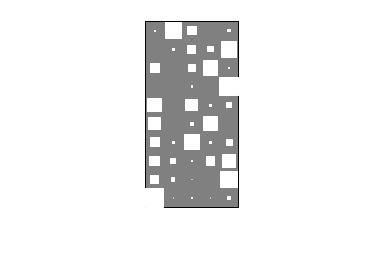

In [7]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(p_topic)
bpplt.pyplot.show()